**IMPORT** **LIBRARY**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

**LOAD DATASET**

In [2]:
df = pd.read_csv("../data/zara_clean.csv")
df.head()

,id,position,promotion,seasonal,volume,name,price,terms,section,income
0,185102,Aisle,No,No,2823,BASIC PUFFER JACKET,19.99,jackets,MAN,56431.77
1,188771,Aisle,No,No,654,TUXEDO JACKET,169.00,jackets,MAN,110526.00
2,180176,End-cap,Yes,Yes,2220,SLIM FIT SUIT JACKET,129.00,jackets,MAN,286380.00
3,112917,Aisle,Yes,Yes,1568,STRETCH SUIT JACKET,129.00,jackets,MAN,202272.00
4,192936,End-cap,No,Yes,2942,DOUBLE FACED JACKET,139.00,jackets,MAN,408938.00


In [3]:
# --- 1) Ringkasan KPI ---
total_income = df["income"].sum()
total_volume = df["volume"].sum()
avg_price    = df["price"].mean()

by_promo = df.groupby("promotion", as_index=False).agg(
    income=("income","sum"),
    volume=("volume","sum"),
    avg_price=("price","mean")
)

print(f"💰 Total Income  : ${total_income:,.2f}")
print(f"📦 Total Volume  : {int(total_volume):,} units")
print(f"🏷️  Avg Price    : ${avg_price:,.2f}")
print("\nRingkasan per Promotion:\n", by_promo)



💰 Total Income  : $38,751,374.48
📦 Total Volume  : 457,735 units
🏷️  Avg Price    : $86.08

Ringkasan per Promotion:
   promotion       income  volume  avg_price
0        No  18994089.58  240312  80.651515
1       Yes  19757284.90  217423  92.106218


C:\Users\yusimaulida\AppData\Local\Temp\ipykernel_6108\82299677.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_bins = df.groupby(["price_bin","promotion"], as_index=False).agg(


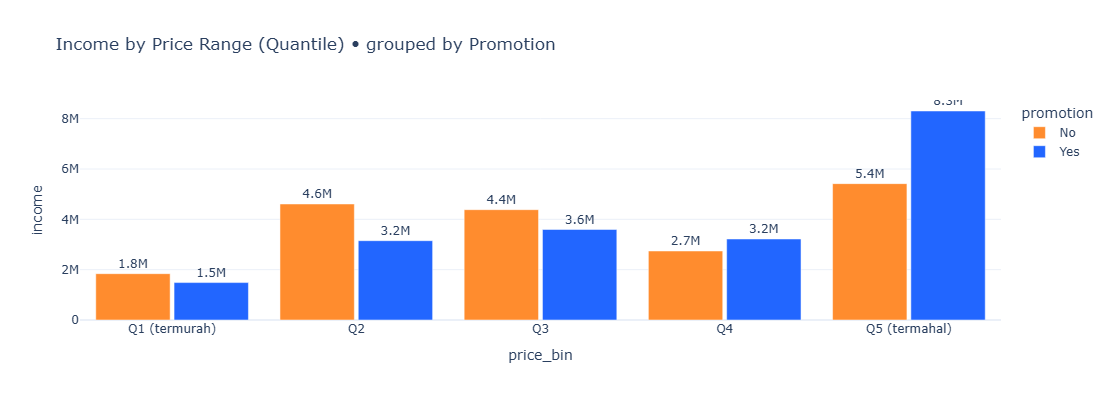

In [4]:
# bikin quantile bins harga
df["price_bin"] = pd.qcut(df["price"], q=5,
                          labels=["Q1 (termurah)", "Q2", "Q3", "Q4", "Q5 (termahal)"])

agg_bins = df.groupby(["price_bin","promotion"], as_index=False).agg(
    income=("income","sum"),
    volume=("volume","sum"),
    avg_price=("price","mean")
)

# bar chart income per price bin
fig_bins = px.bar(
    agg_bins, x="price_bin", y="income", color="promotion",
    barmode="group",
    color_discrete_map={"Yes":"#2266FF","No":"#FF8C2E"},
    text="income",
    hover_data={"avg_price":":.2f","volume":":,","income":":.3s"},
    title="Income by Price Range (Quantile) • grouped by Promotion"
)
fig_bins.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig_bins.update_layout(template="plotly_white", bargap=0.15, bargroupgap=0.05,
                       width=600, height=400)
fig_bins.show()


# **Visualisasi Volume, Price, Promotion, dan Terms terhadap Income.**




**Visualisasi dengan Scatterplot**

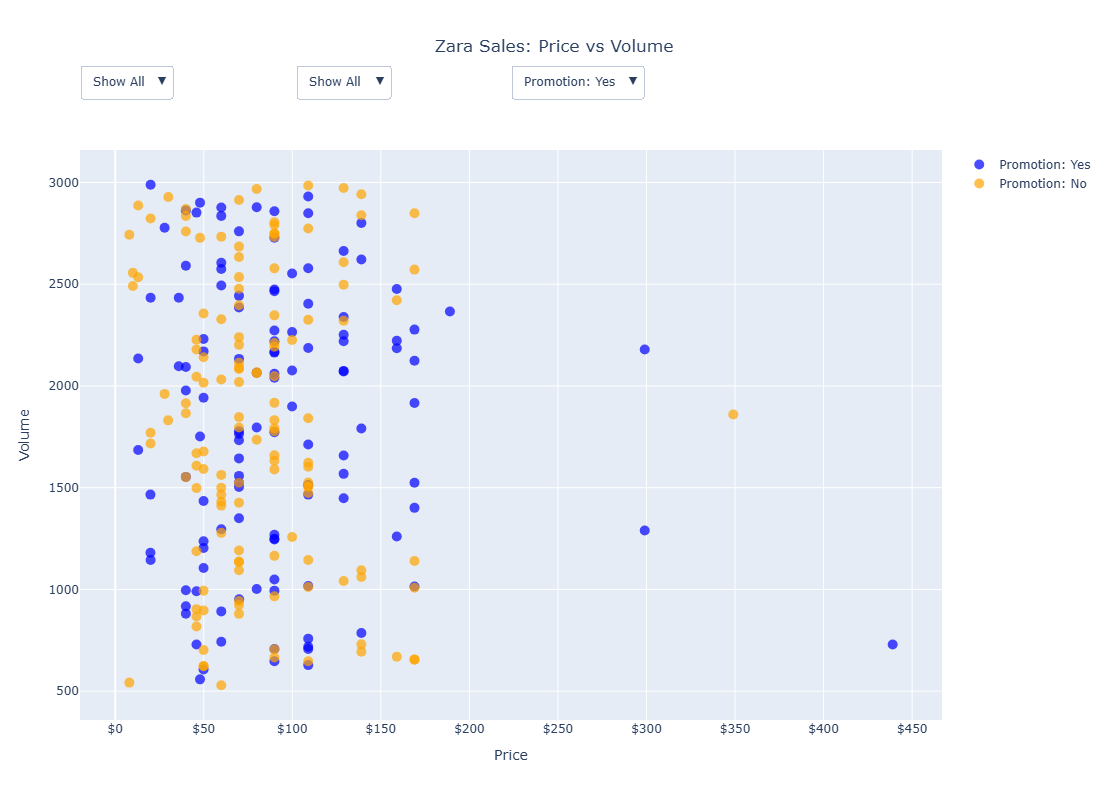

In [5]:
# Membaca data
df = pd.read_csv("../data/zara_clean.csv")

# Menerapkan Trace pada kolom kategorikal 'Promotion' dan parameter 'color' biru dan oranye dengan dictionary marker
def make_trace(promo, dff, color):
    d = dff[dff['promotion'] == promo]
    return go.Scatter(
        x=d['price'],
        y=d['volume'],
        mode='markers',
        name=f"Promotion: {promo}",
        marker=dict(size=10, opacity=0.7, color=color),
        text=[f"Product: {n}<br>Price: {p}$<br>Volume: {v}<br>Promotion: {promo}<br>Income: {inc}"
              for n, p, v, inc in zip(d['name'], d['price'], d['volume'], d['income'])],
        hoverinfo='text',
        visible=True
    )

# Membuat konfigurasi data tanpa filter
fig = go.Figure(data=[make_trace('Yes', df, 'blue'), make_trace('No', df, 'orange')])

# Filter Dropdown untuk kolom 'Section'
sections = df['section'].unique()
dropdown_section = [
    dict(
        label=sec,
        method="update",
        args=[
            {
                "x": [
                    df.query(f"section=='{sec}' and promotion=='Yes'")['price'],
                    df.query(f"section=='{sec}' and promotion=='No'")['price']
                ],
                "y": [
                    df.query(f"section=='{sec}' and promotion=='Yes'")['volume'],
                    df.query(f"section=='{sec}' and promotion=='No'")['volume']
                ],
                "text": [
                    df.query(f"section=='{sec}' and promotion=='Yes'")[['name','price','volume','income']].astype(str).agg('<br>'.join, axis=1),
                    df.query(f"section=='{sec}' and promotion=='No'")[['name','price','volume','income']].astype(str).agg('<br>'.join, axis=1)
                ]
            },
            {"title": f"Scatter: Section = {sec}"}
        ]
    )
    for sec in sections
]

# Tambahkan opsi "Show All" di dropdown section
dropdown_section.insert(0, dict(
    label="Show All",
    method="update",
    args=[
        {
            "x": [
                df[df['promotion'] == 'Yes']['price'],
                df[df['promotion'] == 'No']['price']
            ],
            "y": [
                df[df['promotion'] == 'Yes']['volume'],
                df[df['promotion'] == 'No']['volume']
            ],
            "text": [
                df[df['promotion'] == 'Yes'][['name','price','volume','income']].astype(str).agg('<br>'.join, axis=1),
                df[df['promotion'] == 'No'][['name','price','volume','income']].astype(str).agg('<br>'.join, axis=1)
            ]
        },
        {"title": "Scatter: Section = All"}
    ]
))

# Filter Dropdown untuk kolom 'Terms'
terms = df['terms'].unique()
dropdown_terms = [
    dict(
        label=t,
        method="update",
        args=[
            {
                "x": [
                    df.query(f"terms=='{t}' and promotion=='Yes'")['price'],
                    df.query(f"terms=='{t}' and promotion=='No'")['price']
                ],
                "y": [
                    df.query(f"terms=='{t}' and promotion=='Yes'")['volume'],
                    df.query(f"terms=='{t}' and promotion=='No'")['volume']
                ],
                "text": [
                    df.query(f"terms=='{t}' and promotion=='Yes'")[['name','price','volume','income']].astype(str).agg('<br>'.join, axis=1),
                    df.query(f"terms=='{t}' and promotion=='No'")[['name','price','volume','income']].astype(str).agg('<br>'.join, axis=1)
                ]
            },
            {"title": f"Scatter: Terms = {t}"}
        ]
    )
    for t in terms
]

# Tambahkan opsi "Show All" di dropdown terms
dropdown_terms.insert(0, dict(
    label="Show All",
    method="update",
    args=[
        {
            "x": [
                df[df['promotion'] == 'Yes']['price'],
                df[df['promotion'] == 'No']['price']
            ],
            "y": [
                df[df['promotion'] == 'Yes']['volume'],
                df[df['promotion'] == 'No']['volume']
            ],
            "text": [
                df[df['promotion'] == 'Yes'][['name','price','volume','income']].astype(str).agg('<br>'.join, axis=1),
                df[df['promotion'] == 'No'][['name','price','volume','income']].astype(str).agg('<br>'.join, axis=1)
            ]
        },
        {"title": "Scatter: Terms = All"}
    ]
))

# Filter Dropdown 'Promotion'
dropdown_promo = [
    dict(
        label="Promotion: Yes",
        method="update",
        args=[{"visible": [True, False]}, {"title": "Promotion: Yes"}]
    ),
    dict(
        label="Promotion: No",
        method="update",
        args=[{"visible": [False, True]}, {"title": "Promotion: No"}]
    ),
    dict(
        label="Show Both",
        method="update",
        args=[{"visible": [True, True]}, {"title": "Promotion: Both"}]
    )
]

# Update layout
fig.update_layout(
    title="Zara Sales: Price vs Volume",
    title_x=0.5,
    title_y=0.95,

    updatemenus=[
        dict(buttons=dropdown_section, direction="down", x=0.00, y=1.15, xanchor='left', yanchor='top', showactive=True, bgcolor="white"),
        dict(buttons=dropdown_terms, direction="down", x=0.25, y=1.15, xanchor='left', yanchor='top', showactive=True, bgcolor="white"),
        dict(buttons=dropdown_promo, direction="down", x=0.50, y=1.15, xanchor='left', yanchor='top', showactive=True, bgcolor="white")
    ],

    # Mengatur sumbu X agar menampilkan format USD
    xaxis=dict(
        title="Price",
        tickformat='$,.0f'
    ),
    yaxis_title="Volume",

    margin=dict(t=150),
    dragmode="select",
    height=800
)

fig.show()


**Visualisasi dengan Barchart: Perbandingan dengan 1 Alternatif Visual Encoding**

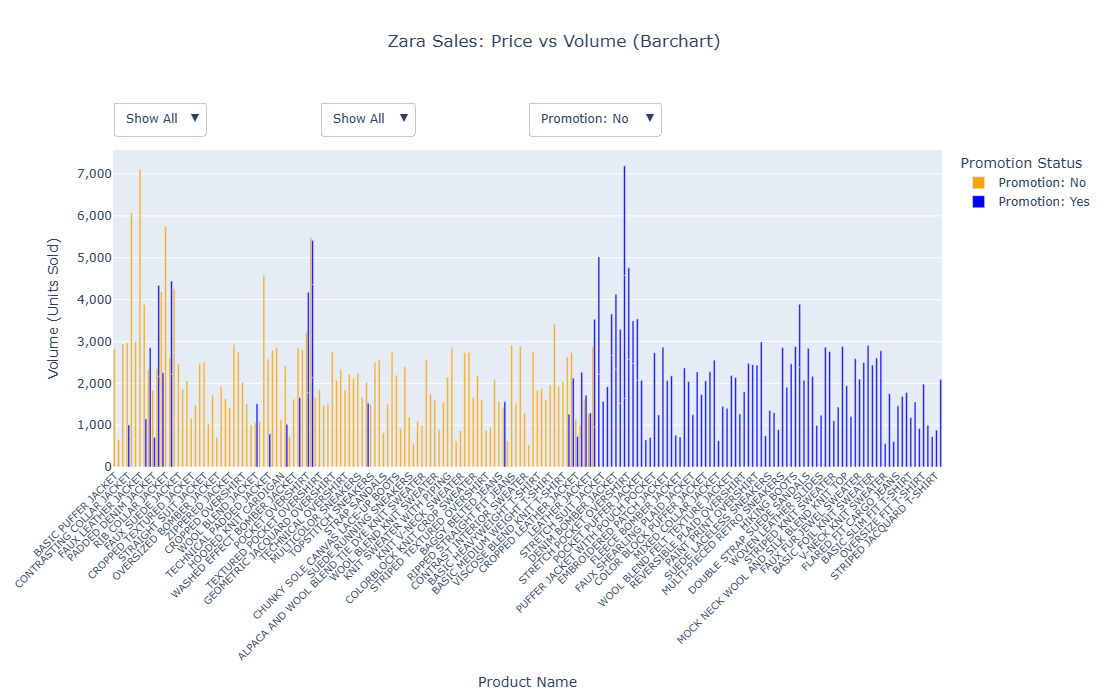

In [6]:
# Membaca Baca data
df = pd.read_csv("../data/zara_clean.csv")

# Menerapkan Trace pada kolom kategorikal 'Promotion' dan parameter 'color' biru dan oranye dengan dictionary marker
def make_trace(promo, dff, color):
    d = dff[dff['promotion'] == promo]
    return go.Bar(
        x=d['name'],
        y=d['volume'],
        name=f"Promotion: {promo}",
        marker_color=color,
        text=[f"<b>{n}</b><br>Price: ${p:,.2f}<br>Volume: {v:,}<br>Promotion: {promo}<br>Income: ${inc:,.2f}"
              for n, p, v, inc in zip(d['name'], d['price'], d['volume'], d['income'])],
        hoverinfo='text'
    )

# Membuat konfigurasi data tanpa filter
fig = go.Figure(data=[make_trace('No', df, 'orange'), make_trace('Yes', df, 'blue')])

# Filter Dropdown untuk kolom 'Section'
sections = df['section'].unique()
dropdown_section = [
    dict(
        label="Show All",
        method="update",
        args=[
            {
                "x": [
                    df[df['promotion'] == 'No']['name'],
                    df[df['promotion'] == 'Yes']['name']
                ],
                "y": [
                    df[df['promotion'] == 'No']['volume'],
                    df[df['promotion'] == 'Yes']['volume']
                ],
                "text": [
                    [f"<b>{n}</b><br>Price: ${p:,.2f}<br>Volume: {v:,}<br>Promotion: No<br>Income: ${inc:,.2f}"
                     for n, p, v, inc in df[df['promotion'] == 'No'][['name','price','volume','income']].itertuples(index=False)],
                    [f"<b>{n}</b><br>Price: ${p:,.2f}<br>Volume: {v:,}<br>Promotion: Yes<br>Income: ${inc:,.2f}"
                     for n, p, v, inc in df[df['promotion'] == 'Yes'][['name','price','volume','income']].itertuples(index=False)]
                ]
            },
            {"title": "Zara Sales (Bar Chart): All Sections"}
        ]
    )
] + [
    dict(
        label=sec,
        method="update",
        args=[
            {
                "x": [
                    df.query(f"section=='{sec}' and promotion=='No'")['name'],
                    df.query(f"section=='{sec}' and promotion=='Yes'")['name']
                ],
                "y": [
                    df.query(f"section=='{sec}' and promotion=='No'")['volume'],
                    df.query(f"section=='{sec}' and promotion=='Yes'")['volume']
                ],
                "text": [
                    [f"<b>{n}</b><br>Price: ${p:,.2f}<br>Volume: {v:,}<br>Promotion: No<br>Income: ${inc:,.2f}"
                     for n, p, v, inc in df.query(f"section=='{sec}' and promotion=='No'")[['name','price','volume','income']].itertuples(index=False)],
                    [f"<b>{n}</b><br>Price: ${p:,.2f}<br>Volume: {v:,}<br>Promotion: Yes<br>Income: ${inc:,.2f}"
                     for n, p, v, inc in df.query(f"section=='{sec}' and promotion=='Yes'")[['name','price','volume','income']].itertuples(index=False)]
                ]
            },
            {"title": f"Zara Sales (Bar Chart): {sec}"}
        ]
    )
    for sec in sections
]

# Filter Dropdown untuk kolom 'Terms'
terms = df['terms'].unique()
dropdown_terms = [
    dict(
        label="Show All",
        method="update",
        args=[
            {
                "x": [
                    df[df['promotion'] == 'No']['name'],
                    df[df['promotion'] == 'Yes']['name']
                ],
                "y": [
                    df[df['promotion'] == 'No']['volume'],
                    df[df['promotion'] == 'Yes']['volume']
                ],
                "text": [
                    [f"<b>{n}</b><br>Price: ${p:,.2f}<br>Volume: {v:,}<br>Promotion: No<br>Income: ${inc:,.2f}"
                     for n, p, v, inc in df[df['promotion'] == 'No'][['name','price','volume','income']].itertuples(index=False)],
                    [f"<b>{n}</b><br>Price: ${p:,.2f}<br>Volume: {v:,}<br>Promotion: Yes<br>Income: ${inc:,.2f}"
                     for n, p, v, inc in df[df['promotion'] == 'Yes'][['name','price','volume','income']].itertuples(index=False)]
                ]
            },
            {"title": "Zara Sales (Bar Chart): All Terms"}
        ]
    )
] + [
    dict(
        label=t,
        method="update",
        args=[
            {
                "x": [
                    df.query(f"terms=='{t}' and promotion=='No'")['name'],
                    df.query(f"terms=='{t}' and promotion=='Yes'")['name']
                ],
                "y": [
                    df.query(f"terms=='{t}' and promotion=='No'")['volume'],
                    df.query(f"terms=='{t}' and promotion=='Yes'")['volume']
                ],
                "text": [
                     [f"<b>{n}</b><br>Price: ${p:,.2f}<br>Volume: {v:,}<br>Promotion: No<br>Income: ${inc:,.2f}"
                     for n, p, v, inc in df.query(f"terms=='{t}' and promotion=='No'")[['name','price','volume','income']].itertuples(index=False)],
                    [f"<b>{n}</b><br>Price: ${p:,.2f}<br>Volume: {v:,}<br>Promotion: Yes<br>Income: ${inc:,.2f}"
                     for n, p, v, inc in df.query(f"terms=='{t}' and promotion=='Yes'")[['name','price','volume','income']].itertuples(index=False)]
                ]
            },
            {"title": f"Zara Sales (Bar Chart): {t}"}
        ]
    )
    for t in terms
]

# Filter Dropdown untuk kolom 'Promotion'
dropdown_promo = [
    dict(
        label="Promotion: No",
        method="update",
        args=[{"visible": [True, False]}, {"title": "Sales without Promotion"}]
    ),
    dict(
        label="Promotion: Yes",
        method="update",
        args=[{"visible": [False, True]}, {"title": "Sales with Promotion"}]
    ),
    dict(
        label="Show Both",
        method="update",
        args=[{"visible": [True, True]}, {"title": "Sales: All Products"}]
    )
]

fig.update_layout(
    barmode="group",
    title="Zara Sales: Price vs Volume (Barchart)",
    title_x=0.5,
    title_y=0.95,

    updatemenus=[
        dict(buttons=dropdown_section, direction="down", x=0.00, y=1.15, xanchor='left', yanchor='top', bgcolor="white"),
        dict(buttons=dropdown_terms, direction="down", x=0.25, y=1.15, xanchor='left', yanchor='top', bgcolor="white"),
        dict(buttons=dropdown_promo, direction="down", x=0.50, y=1.15, xanchor='left', yanchor='top', bgcolor="white")
    ],

    yaxis_title="Volume (Units Sold)",
    yaxis=dict(tickformat=',.0f'),

    xaxis=dict(
        title="Product Name",
        tickangle=-45,
        tickfont=dict(size=10)
    ),

    legend_title_text='Promotion Status',
    height=700,

    margin=dict(t=150, b=150)
)

fig.show()